In [2]:
import numpy as np
import matplotlib.pylab as plt
import statsmodels.api as sm

# 1) Random agents

We first plot the log-price $p$ as a function of time when the returns $r_t$ are $1000$ i.i.d random variables $\epsilon_t$ of law $\mathcal{N}(0, 1)$. These represent random agents. We then compute the cumulative sum of these variables as we recall : $$r_t = p_t - p_{t-1} \Leftrightarrow p_{t+1} = p_t + r_t$$

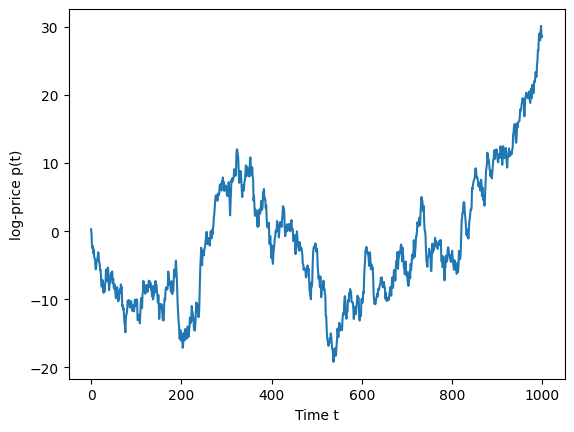

In [3]:
Nit = 1000
R_arr = np.random.normal(0, 1, (Nit))
P = np.cumsum(R_arr)
plt.plot(P)
plt.xlabel("Time t")
plt.ylabel("log-price p(t)")
plt.show()

# 2) Adding strategy agents

We then add a number $\phi_1$ of *strategy agents*. These can follow a number of strategies of which we consider $2$ types : conditional and moving average. For conditional strategies, the strategy agents have a return that depends on the sign of previous returns. For $\phi_1 = 1$, we have as many strategy agents as random agents. Let's look at a strategy where $$\omega_{1, t+1} = \phi_1 \times a_{1,t}(\text{information}_{t-1}) \qquad \text{where } a_{1,t} = +\text{sign } r_t$$ and then $$r_{t+1} = \epsilon_{t+1} + \omega_{1, t+1}$$ We finally compare the resulting log-price $p$ *with strategy agents* to the one *without strategy agents*.
Hypothesis : no budget constraints.

## Analysis of a single strategy

### Log-price plot

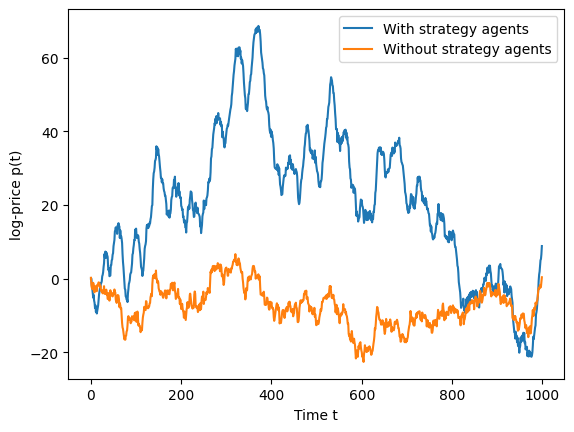

In [4]:
# Conditional 1 strategy
phi_1 = 1
r = np.zeros(Nit)
eps = np.random.normal(0, 1, (Nit))
for t in range(1, r.shape[0]-1):
    r[t+1] = eps[t] + phi_1*np.sign(r[t-1])
p_strat = np.cumsum(r)
p_random = np.cumsum(eps)

plt.plot(p_strat, label='With strategy agents')
plt.plot(p_random, label='Without strategy agents')
plt.xlabel('Time t')
plt.ylabel('log-price p(t)')
plt.legend()
plt.show()

After plotting a few times, we see that the price is more volatile when there are strategy agents. Indeed, we notice sharp price variations and much more range in the values the price can take. We can summarize these observations by saying that there is more uncertainty regarding price movements. To quantify this uncertainty, we compare the variance of $r$ to the one of $\epsilon$ (which is $1$).

### Comparison of variance

In [5]:
v_r = np.var(r)
v_eps = np.var(eps)
print(f"Variance of returns with strategy agents is {v_r}",f"Variance of returns without strategy agents is {v_eps}",sep="\n")

Variance of returns with strategy agents is 1.9894191969178696
Variance of returns without strategy agents is 1.070298167487299


### Comparison of autocorrelation

But we can go further : let us plot the auto-correlation of $r$ and $\epsilon$ using the statsmodel library.

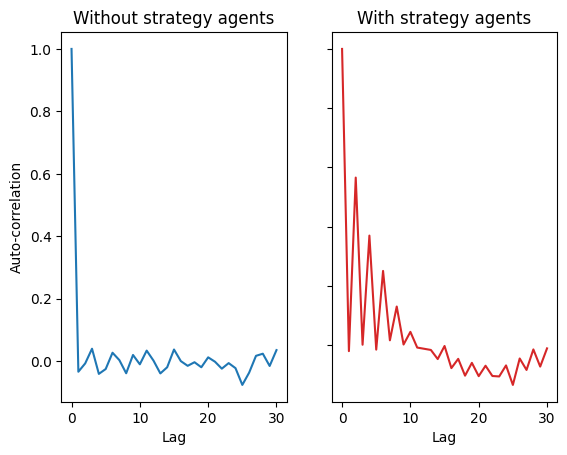

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(sm.tsa.acf(eps))
ax2.plot(sm.tsa.acf(r), color='tab:red')
ax1.set(xlabel="Lag", ylabel="Auto-correlation")
ax2.set(xlabel="Lag", ylabel="Auto-correlation")
ax1.set_title("Without strategy agents")
ax2.set_title("With strategy agents")
ax1.label_outer()
ax2.label_outer()
plt.show()

We have interesting results. Indeed, while the auto-correlation of $\epsilon$ shows randomness (auto-correlation close to zero), we have multiple significantly non-zero auto-correlations for $r$ (return with strategy). We can conclude that having strategy agents has a clear influence on price action, because there is now correlation between successive returns.

We can see on the auto-correlation plot that the data is trended, which makes it a bit more  predictable than completely random, but this isn't sufficient nonetheless to predict price movements with accuracy. Therefore, price return are not predictable.

### Variance of the return for various values of $\phi_1$

We now compute the return for multiple values of $\phi_1$, which we now store in an array.

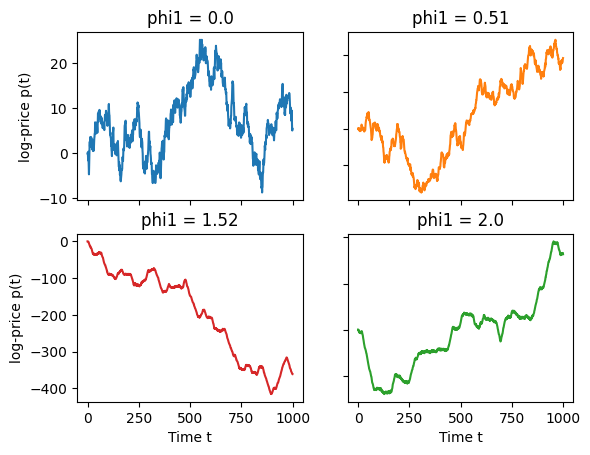

In [7]:
Nphi = 100
phi_1_arr = np.linspace(0, 2, Nphi)
r_m = np.zeros((Nphi, Nit))
eps_m = np.random.normal(0, 1, size=(Nphi, Nit))
for t in range(1, r.shape[0]-1):
    r_m[:,t+1] = eps_m[:,t] + phi_1_arr.T*np.sign(r_m[:,t-1])

# as an example, we plot the price for 4 distinct values of phi1
fig, axs = plt.subplots(2,2)
axs[0,0].plot(np.cumsum(r_m[0,:]))
axs[0,0].set_title(f'phi1 = {phi_1_arr[0]}')
axs[0,1].plot(np.cumsum(r_m[Nphi//4,:]), color='tab:orange')
axs[0,1].set_title(f'phi1 = {round(phi_1_arr[Nphi//4],2)}')
axs[1,0].plot(np.cumsum(r_m[(3*Nphi)//4,:]), color='tab:red')
axs[1,0].set_title(f'phi1 = {round(phi_1_arr[(3*Nphi)//4], 2)}')
axs[1,1].plot(np.cumsum(r_m[Nphi-1,:]), color='tab:green')
axs[1,1].set_title(f'phi1 = {round(phi_1_arr[Nphi-1], 2)}')
for ax in axs.flat:
    ax.set(xlabel='Time t', ylabel='log-price p(t)')
    ax.label_outer()
plt.show()

We can then compute the variance of the return for each value of $\phi_1$.

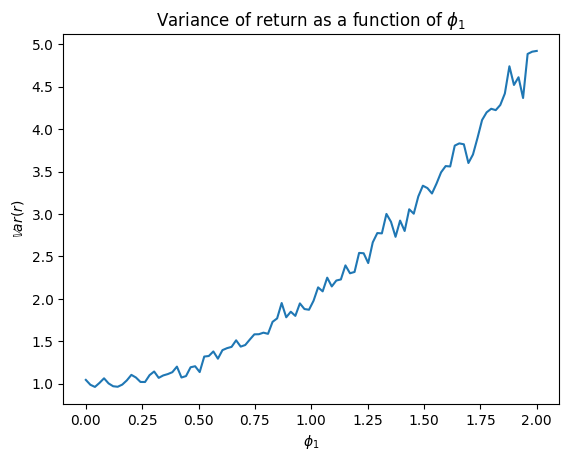

In [8]:
v_r_m = np.var(r_m, axis=1)

# we plot the variance as a function of phi_1
plt.plot(phi_1_arr, v_r_m)
plt.xlabel('$\phi_1$')
plt.ylabel('$\mathbb{V}ar(r)$')
plt.title('Variance of return as a function of $\phi_1$')
plt.show()

We can clearly see that the variance of the return grows as a function of $\phi_1$. Thus, the return is more volatile when there are more strategy agents than random agents. The immediate effect of introducing strategy into price movements is volatility. Now let us plot the lag-1 auto-correlation of the return.

### Lag-1 autocorrelation analysis

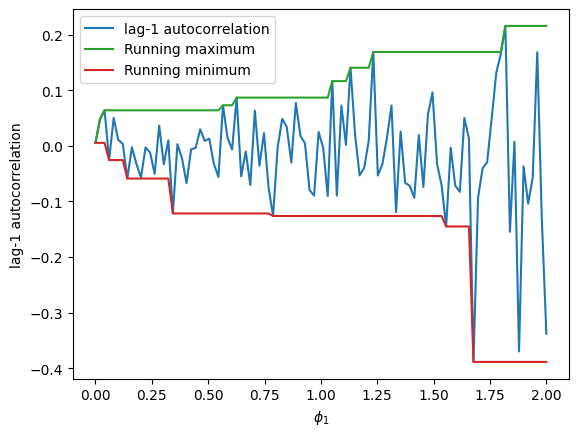

In [9]:
auto_corr = np.zeros(r_m.shape[0])
for i in range(r_m.shape[0]):
    auto_corr[i] = sm.tsa.acf(r_m[i,:])[1]
running_max = np.maximum.accumulate(auto_corr)
running_min = np.minimum.accumulate(auto_corr)
plt.plot(phi_1_arr, auto_corr, label='lag-1 autocorrelation')
plt.plot(phi_1_arr, running_max, label='Running maximum', color='tab:green')
plt.plot(phi_1_arr, running_min, label='Running minimum', color='tab:red')
plt.legend()
plt.xlabel('$\phi_1$')
plt.ylabel('lag-1 autocorrelation')
plt.show()

As the value of $\phi_1$ grows, so does the lag-1 autocorrelation (in absolute value), indicating higher correlation between successive values of the return when there are strategy agents. We can see the gap between minimum and maximum is increasing with $\phi_1$.

## Adding another strategy

We now add another group of stratgy agents, denoted by $\phi_2$, using a strategy $a_2$ of opposite nature type. Thus, we use here a moving-average strategy for this group.

### Mean-reverting moving average strategy

We first plot the log-price $p$ for a single group using the mean-reverting moving average strategy.

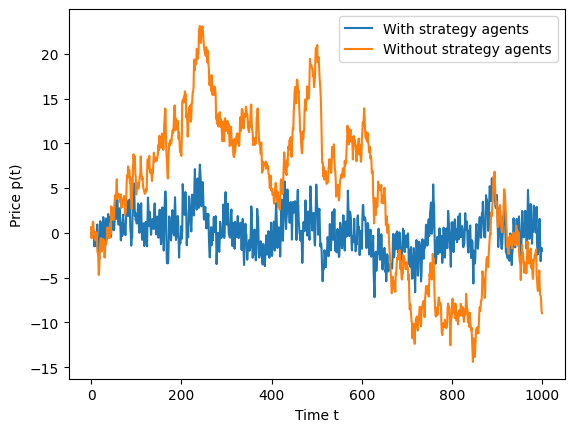

In [10]:
# Moving average - Mean reverting

phi_2 = 1
r_ma = np.zeros(Nit)
MA = np.zeros(Nit)
p_strat_ma = np.zeros(Nit)
k = 5
eps_ma = np.random.normal(0, 1, (Nit))
for t in range(k, r_ma.shape[0]-1):
    p_strat_ma[t] = p_strat_ma[t-1] + r_ma[t]
    MA[t] = 1/k*np.sum(p_strat_ma[t-(k-1):t])
    r_ma[t+1] = eps_ma[t] - phi_2*np.sign(p_strat_ma[t-1] - MA[t-1])
p_strat_ma[-1] = p_strat_ma[-2] + r_ma[-1]
p_ma = np.cumsum(eps_ma)

plt.plot(p_strat_ma, label='With strategy agents')
plt.plot(p_ma, label='Without strategy agents')
plt.xlabel('Time t')
plt.ylabel('Price p(t)')
plt.legend()
plt.show()

 We can see that the price remains close to $0$, which makes sense. Let us plot the autocorrelation for this strategy.

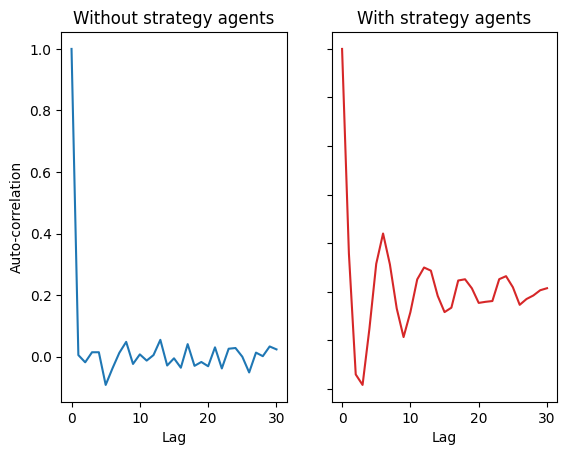

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(sm.tsa.acf(eps_ma))
ax2.plot(sm.tsa.acf(r_ma), color='tab:red')
ax1.set(xlabel="Lag", ylabel="Auto-correlation")
ax2.set(xlabel="Lag", ylabel="Auto-correlation")
ax1.set_title("Without strategy agents")
ax2.set_title("With strategy agents")
ax1.label_outer()
ax2.label_outer()
plt.show()

We also plot the lag-1 autocorrelation for $\phi_2$ varying from $0$ to $2$.

In [27]:
# Computation of the price return array

phi_2_arr = np.linspace(0, 2, Nphi)
r_ma_m = np.zeros((Nphi, Nit))
MA_m = np.zeros((Nphi, Nit))
p_strat_ma_m = np.zeros((Nphi, Nit))
k = 5
eps_ma_m = np.random.normal(0, 1, (Nphi, Nit))
for t in range(k, r_ma_m.shape[0]-1):
    p_strat_ma_m[:,t] = p_strat_ma_m[:,t-1] + r_ma_m[:,t]
    MA_m[:,t] = 1/k*np.sum(p_strat_ma_m[:,t-(k-1):t])
    r_ma_m[:,t+1] = eps_ma_m[:,t] - phi_2_arr*np.sign(p_strat_ma_m[:,t-1] - MA_m[:,t-1])

r_ma_m.shape


(100, 1000)

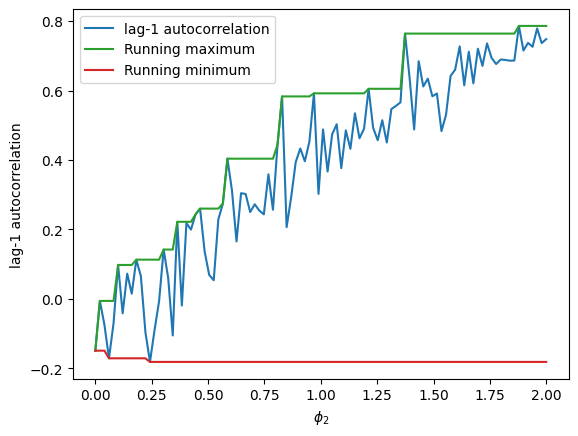

In [13]:
# Plotting lag-1 autocorrelation

auto_corr_ma = np.zeros(r_ma_m.shape[0])
for i in range(r_ma_m.shape[0]):
    auto_corr_ma[i] = sm.tsa.acf(r_ma_m[i,:])[1]
running_max = np.maximum.accumulate(auto_corr_ma)
running_min = np.minimum.accumulate(auto_corr_ma)
plt.plot(phi_2_arr, auto_corr_ma, label='lag-1 autocorrelation')
plt.plot(phi_2_arr, running_max, label='Running maximum', color='tab:green')
plt.plot(phi_2_arr, running_min, label='Running minimum', color='tab:red')
plt.legend()
plt.xlabel('$\phi_2$')
plt.ylabel('lag-1 autocorrelation')
plt.show()

Here we notice that the lag-1 autocorrelation grows much quicker than the lag-1 autocorrelation of our first strategy.

### Two strategy groups

Now let us put the two groups together !

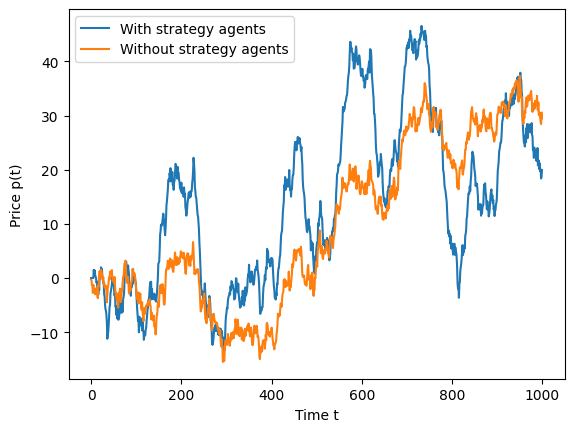

In [14]:
phi_1 = 0.8
phi_2 = 0.1

r_2 = np.zeros(Nit)
MA_2 = np.zeros(Nit)
p_strat_2 = np.zeros(Nit)
k = 5
eps_2 = np.random.normal(0, 1, (Nit))
for t in range(k, r_2.shape[0]-1):
    p_strat_2[t] = p_strat_2[t-1] + r_2[t]
    MA_2[t] = 1/k*np.sum(p_strat_2[t-(k-1):t])
    r_2[t+1] = eps_2[t] + phi_1*np.sign(r_2[t-1]) - phi_2*np.sign(p_strat_2[t-1] - MA_2[t-1]) 
p_strat_2[-1] = p_strat_2[-2] + r_2[-1]
p_2 = np.cumsum(eps_2)

plt.plot(p_strat_2, label='With strategy agents')
plt.plot(p_2, label='Without strategy agents')
plt.xlabel('Time t')
plt.ylabel('Price p(t)')
plt.legend()
plt.show()

Now we can look at the variance of the return for various values of $(\phi_1, \phi_2)$ (with $0 \leq \phi_1 + \phi_2 \leq 2$). N.B : takes time to compute for `grid_res = 300`, can be reduced to `grid_res = 100` or lower.

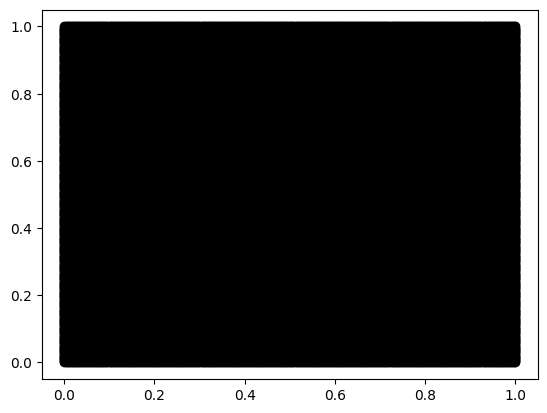

In [15]:
# Creating the grid

grid_res = 300
phi_1g, phi_2g = np.meshgrid(np.linspace(0, 1, grid_res), np.linspace(0, 1, grid_res))
plt.plot(phi_1g, phi_2g, marker='o', color='k', linestyle='none')
plt.show()

In [16]:
# Computing the variance of the return

r_2m = np.zeros((grid_res, grid_res, Nit))
MA_2m = np.zeros((grid_res, grid_res, Nit))
eps_2m = np.random.normal(0, 1, size=(grid_res, grid_res, Nit))
p_strat_2m = np.zeros((grid_res, grid_res, Nit))
for t in range(k, r_2m.shape[0]-1):
    p_strat_2m[:,:,t] = p_strat_2m[:,:,t-1] + r_2m[:,:,t]
    MA_2m[:,:,t] = 1/k*np.sum(p_strat_2m[:,:,t-(k-1):t])
    r_2m[:,:,t+1] = eps_2m[:,:,t] + phi_1g*np.sign(r_2m[:,:,t-1]) + phi_2g*np.sign(p_strat_2m[:,:,t-1] - MA_2m[:,:,t-1])
p_strat_2m[:,:,-1] = p_strat_2m[:,:,-2] + r_2m[:,:,-1]

r_var = np.var(r_2m, axis=2)

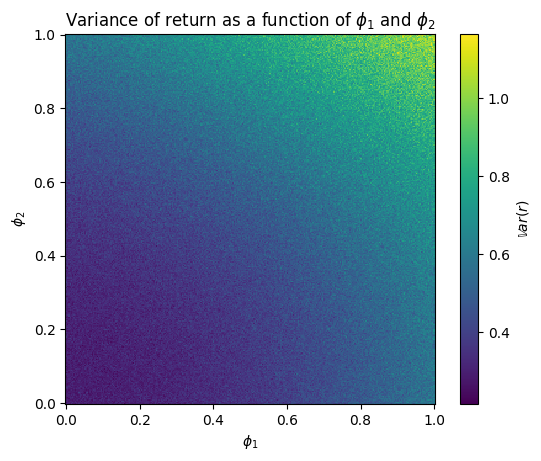

In [17]:
# Plotting

plt.pcolor(phi_1g, phi_2g, r_var)
plt.axis('scaled')
plt.colorbar(label='$\mathbb{V}ar(r)$')
plt.xlabel('$\phi_1$')
plt.ylabel('$\phi_2$')
plt.title('Variance of return as a function of $\phi_1$ and $\phi_2$')
plt.show()

This corroborates our previous findings : volatility grows as a function of the sum of $\phi_1$ and $\phi_2$. Groups of strategy agents have a cumulative effect on price action volatility.

In [18]:
auto_corr_2 = np.zeros((r_2m.shape[0], r_2m.shape[1]))
for i in range(r_2m.shape[0]):
    for j in range(r_2m.shape[1]):
        auto_corr_2[i,j] = sm.tsa.acf(r_2m[i,j,:])[1]

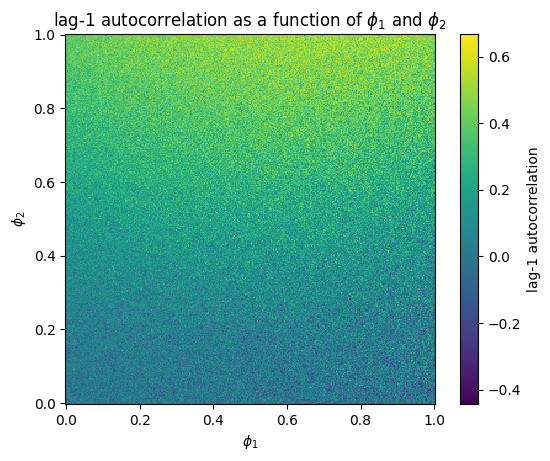

In [19]:
# Plotting lag-1 autocorrelation

plt.pcolor(phi_1g, phi_2g, auto_corr_2)
plt.axis('scaled')
plt.colorbar(label='lag-1 autocorrelation')
plt.xlabel('$\phi_1$')
plt.ylabel('$\phi_2$')
plt.title('lag-1 autocorrelation as a function of $\phi_1$ and $\phi_2$')
plt.show()

Here we notice that the lag-1 autocorrelation grows with $\phi_2$, but not really with $\phi_1$. This is a bit counterintuitive (assuming the computation is correct), but we can say that the mean-reversing moving average strategy takes into account previous prices while the conditional strategy depends only on previous returns. We have noticed previously that lag-1 autocorrelation grows much quicker with the mean-reversing strategy. So, $\phi_2$ has more influence on predictability, which is shown by this graph. Additionally, we can plot the 1-lag autocorrelation in absolute value.

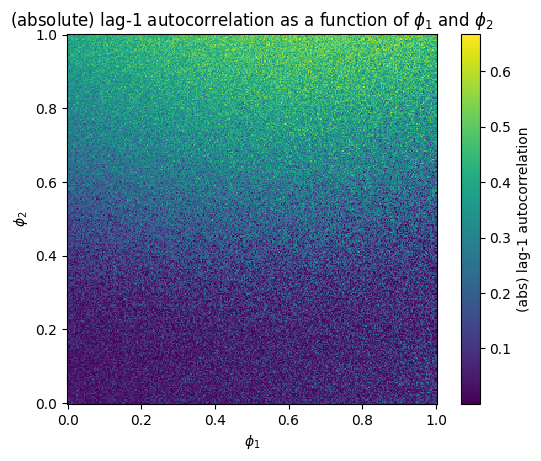

In [20]:
# Plotting absolute lag-1 autocorrelation

plt.pcolor(phi_1g, phi_2g, np.abs(auto_corr_2))
plt.axis('scaled')
plt.colorbar(label='(abs) lag-1 autocorrelation')
plt.xlabel('$\phi_1$')
plt.ylabel('$\phi_2$')
plt.title('(absolute) lag-1 autocorrelation as a function of $\phi_1$ and $\phi_2$')
plt.show()

This shows that price returns are unpredictable when $\phi_2$ is close to $0$.

## Other strategies

Below we plot the log-price for other strategies used by strategy agents. The same analysis can be done with them.

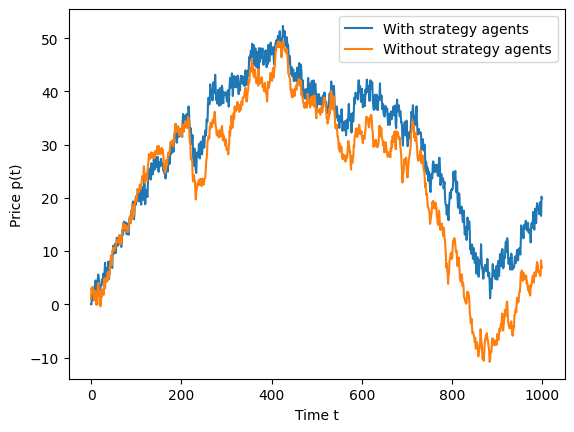

In [21]:
# Conditional 2

phi_1 = 1
r = np.zeros(Nit)
R_arr = np.random.normal(0, 1, (Nit))
for t in range(1, r.shape[0]-1):
    r[t+1] = R_arr[t] - phi_1*np.sign(r[t-1])
P_strat = np.cumsum(r)
P = np.cumsum(R_arr)

plt.plot(P_strat, label='With strategy agents')
plt.plot(P, label='Without strategy agents')
plt.xlabel('Time t')
plt.ylabel('Price p(t)')
plt.legend()
plt.show()

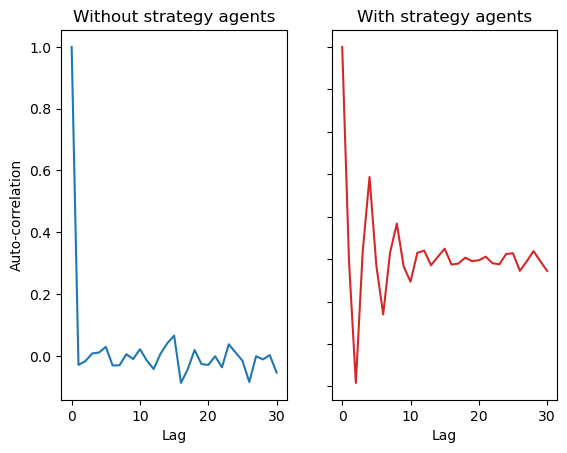

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(sm.tsa.acf(R_arr))
ax2.plot(sm.tsa.acf(r), color='tab:red')
ax1.set(xlabel="Lag", ylabel="Auto-correlation")
ax2.set(xlabel="Lag", ylabel="Auto-correlation")
ax1.set_title("Without strategy agents")
ax2.set_title("With strategy agents")
ax1.label_outer()
ax2.label_outer()
plt.show()

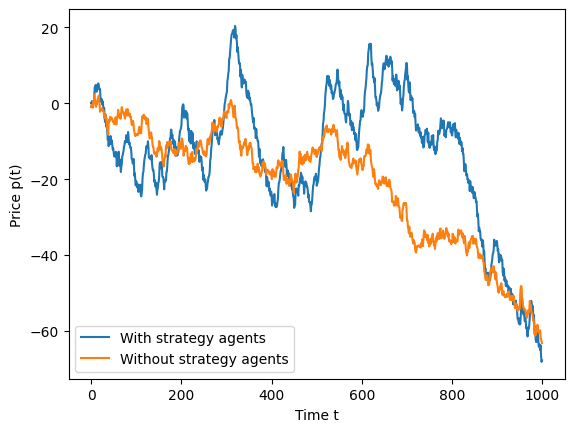

In [22]:
# Conditional 3

phi_1 = 1
r = np.zeros(Nit)
R_arr = np.random.normal(0, 1, (Nit))
for t in range(1, r.shape[0]-1):
    r[t+1] = R_arr[t] + phi_1*np.sign(r[t]*r[t-1])
P_strat = np.cumsum(r)
P = np.cumsum(R_arr)

plt.plot(P_strat, label='With strategy agents')
plt.plot(P, label='Without strategy agents')
plt.xlabel('Time t')
plt.ylabel('Price p(t)')
plt.legend()
plt.show()

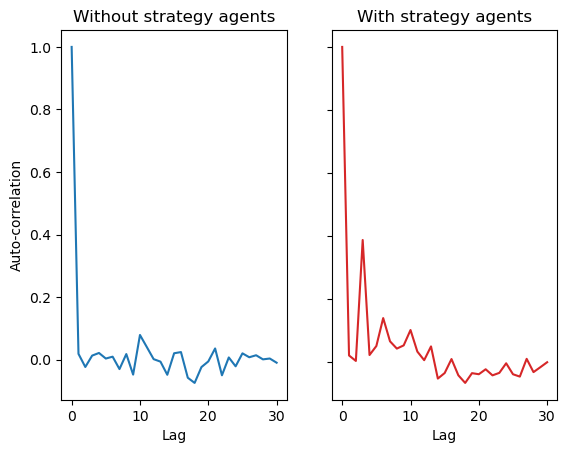

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(sm.tsa.acf(R_arr))
ax2.plot(sm.tsa.acf(r), color='tab:red')
ax1.set(xlabel="Lag", ylabel="Auto-correlation")
ax2.set(xlabel="Lag", ylabel="Auto-correlation")
ax1.set_title("Without strategy agents")
ax2.set_title("With strategy agents")
ax1.label_outer()
ax2.label_outer()
plt.show()

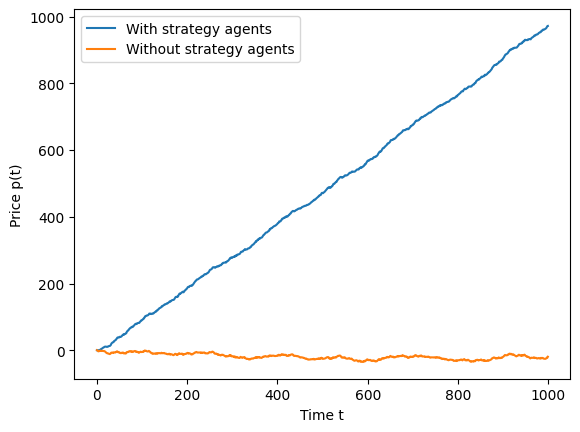

In [23]:
# Moving average - Trend following (1)

phi_1 = 1
r = np.zeros(Nit)
MA = np.zeros(Nit)
P_strat = np.zeros(Nit)
k = 5
R_arr = np.random.normal(0, 1, (Nit))
for t in range(k, r.shape[0]-1):
    P_strat[t] = P_strat[t-1] + r[t]
    MA[t] = 1/k*np.sum(P_strat[t-(k-1):t])
    r[t+1] = R_arr[t] + phi_1*np.sign(P_strat[t-1] - MA[t-1])
P_strat[-1] = P_strat[-2] + r[-1]
P = np.cumsum(R_arr)

plt.plot(P_strat, label='With strategy agents')
plt.plot(P, label='Without strategy agents')
plt.xlabel('Time t')
plt.ylabel('Price p(t)')
plt.legend()
plt.show()



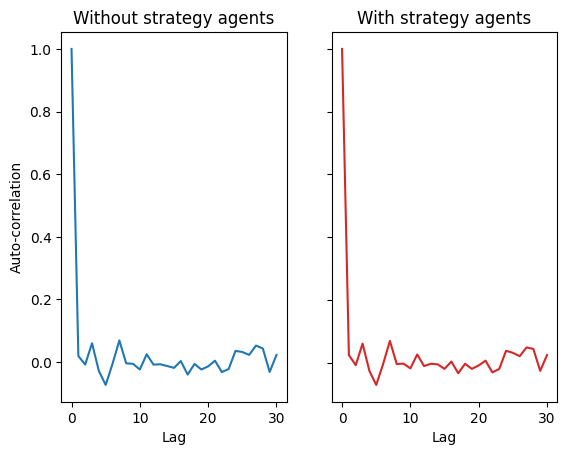

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(sm.tsa.acf(R_arr))
ax2.plot(sm.tsa.acf(r), color='tab:red')
ax1.set(xlabel="Lag", ylabel="Auto-correlation")
ax2.set(xlabel="Lag", ylabel="Auto-correlation")
ax1.set_title("Without strategy agents")
ax2.set_title("With strategy agents")
ax1.label_outer()
ax2.label_outer()
plt.show()

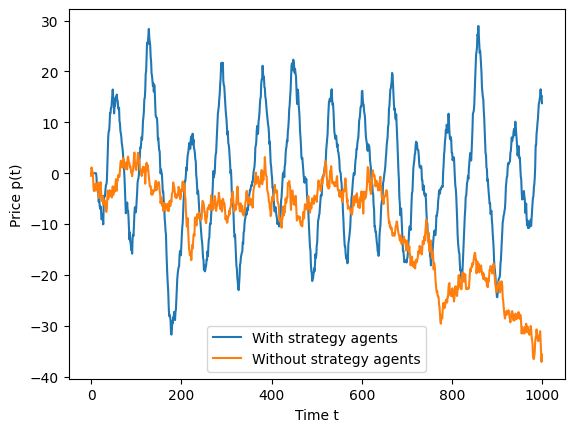

In [25]:
# Moving average - Trend following 2

Nit = 1000
phi = 1
r = np.zeros(Nit)
MA_k = np.zeros(Nit)
MA_kp = np.zeros(Nit)
P_strat = np.zeros(Nit)
k = 11
k_prime = 3

for t in range(max(k, k_prime), r.shape[0]-1):
    P_strat[t] = P_strat[t-1] + r[t]
    MA_k[t] = 1/k*np.sum(P_strat[t-(k-1):t])
    MA_kp[t] = 1/k_prime*np.sum(P_strat[t-(k_prime-1):t])
    r[t+1] = np.random.normal(0, 1) - phi*np.sign(MA_k[t-1] - MA_kp[t-1])
P_strat[-1] = P_strat[-2] + r[-1]
R_arr = np.random.normal(0, 1, (Nit))
P = np.cumsum(R_arr)

plt.plot(P_strat, label='With strategy agents')
plt.plot(P, label='Without strategy agents')
plt.xlabel('Time t')
plt.ylabel('Price p(t)')
plt.legend()
plt.show()

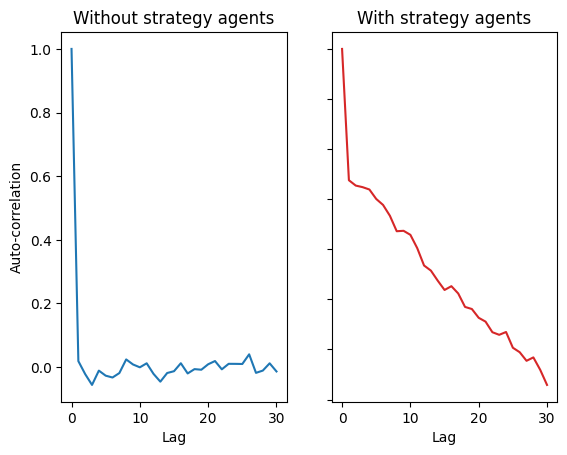

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(sm.tsa.acf(R_arr))
ax2.plot(sm.tsa.acf(r), color='tab:red')
ax1.set(xlabel="Lag", ylabel="Auto-correlation")
ax2.set(xlabel="Lag", ylabel="Auto-correlation")
ax1.set_title("Without strategy agents")
ax2.set_title("With strategy agents")
ax1.label_outer()
ax2.label_outer()
plt.show()

### We could put all these strategies into one world and try to predict price movements. Knowing the number of agents in each group, making good predictions seems possible.